# Лабораторная работа №2 39 вариант
## набор данных - 11 poker
## Классификаторы 2,3
## 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
## 3 – линейный классификатор (персептрон)


1.  Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

 1, 3, 5, 7, 9 - S1, S2, S3, S4, S5 “Suit of card #1, #2, #3, #4, #5”  
 Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} - "масть карты" численная величина (1-4) {червы, пики, бубны, трефы}
 
 2, 4, 6, 8, 10 - C1, C2, C3, C4, C5 “Rank of card #1, #2, #3, #4, 5”  
 Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) - "достоинство карты" численная величина (1-13) (Туз, 2, 3, ... , дама, король)
 
 11 - CLASS “Poker Hand” Ordinal (0-9) - "Комбинации карт" численная величина (0-9)
 

2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [1]:
import pandas as pd
poker_df = pd.read_csv('poker-hand-training-true.data.txt')
poker_df.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4',  'S5',  'C5', 'PokerHand']
print("Размер входных данных до удаления ",poker_df.shape[0])
#удаление повторов
#poker_df.dropna(how = 'any', inplace = True)
poker_df.drop_duplicates(keep = 'last', inplace = True)
print("Размер входных данных после удаления ",poker_df.shape[0])
poker_df

Размер входных данных до удаления  25009
Размер входных данных после удаления  25007


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,PokerHand
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

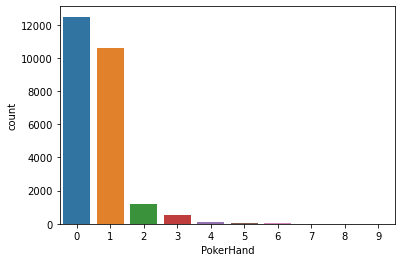

In [2]:
import seaborn as sns
sns.countplot(data=poker_df, x='PokerHand')

Данные не сбалансированы по классам, преобладают классы с номерами 0 и 1. Предпочтительнее использовать PR кривую.

4. 	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

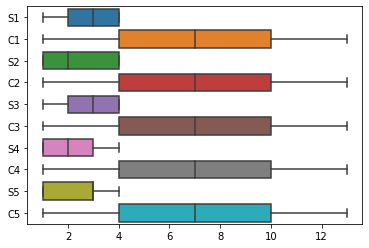

In [3]:
from sklearn.preprocessing import MinMaxScaler
poker_df_uns = poker_df.drop('PokerHand', axis = 1)
sns.boxplot(data = poker_df_uns, orient = 'h')

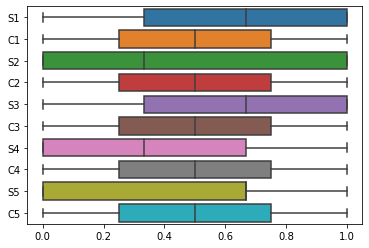

In [5]:
scaler = MinMaxScaler()
columns = poker_df_uns.columns
poker_df_uns[columns] = scaler.fit_transform(poker_df_uns[columns])
sns.boxplot(data = poker_df_uns, orient = 'h')

5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [7]:
from sklearn.preprocessing import OneHotEncoder
poker_df = pd.get_dummies(poker_df, columns = ['PokerHand'])
poker_df

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,PokerHand_0,PokerHand_1,PokerHand_2,PokerHand_3,PokerHand_4,PokerHand_5,PokerHand_6,PokerHand_7,PokerHand_8,PokerHand_9
0,2,11,2,13,2,10,2,12,2,1,0,0,0,0,0,0,0,0,0,1
1,3,12,3,11,3,13,3,10,3,1,0,0,0,0,0,0,0,0,0,1
2,4,10,4,11,4,1,4,13,4,12,0,0,0,0,0,0,0,0,0,1
3,4,1,4,13,4,12,4,11,4,10,0,0,0,0,0,0,0,0,0,1
4,1,2,1,4,1,5,1,3,1,6,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,1,0,0,0,0,0,0,0,0,0
25005,4,1,4,10,3,13,3,4,1,10,0,1,0,0,0,0,0,0,0,0
25006,2,1,2,10,4,4,4,1,4,13,0,1,0,0,0,0,0,0,0,0
25007,2,12,4,3,1,10,1,12,4,9,0,1,0,0,0,0,0,0,0,0


6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

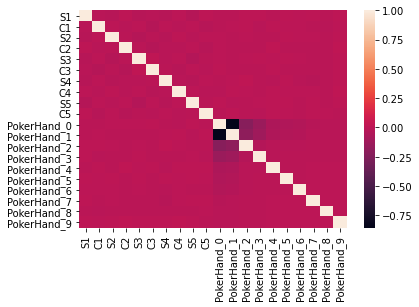

In [9]:
correl = poker_df.corr()
sns.heatmap(correl)

7.	Заполните пропущенные значения в данных;

In [10]:
poker_df.count()

S1             25007
C1             25007
S2             25007
C2             25007
S3             25007
C3             25007
S4             25007
C4             25007
S5             25007
C5             25007
PokerHand_0    25007
PokerHand_1    25007
PokerHand_2    25007
PokerHand_3    25007
PokerHand_4    25007
PokerHand_5    25007
PokerHand_6    25007
PokerHand_7    25007
PokerHand_8    25007
PokerHand_9    25007
dtype: int64

пропусков в данных нет.

8. Решите поставленную задачу классификации в соответствии с заданием. При
подборе параметров классификатора используйте метод GridSearchCV
и перекрёстную проверку (изучите возможные для изменения параметры классификации).
Определите схему построения многоклассового классификатора, используемую
по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор).
Постройте, если это возможно, многоклассовую классификацию на основе
схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой
их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные
кривые, а также кривые для микро и макроусреднения метрик качества).
Для линейного классификатора используйте регуляризацию.

Классификаторы 2,3  
2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);  
3 – линейный классификатор (персептрон);

In [16]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
import numpy as np
#gridsearch
x = poker_df_uns
y = poker_df['PokerHand_0']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
rnc = RadiusNeighborsClassifier()
search = GridSearchCV(rnc, {'radius': np.linspace(1, 5, 25), 'weights': ['uniform', 'distance']})
search.fit(x_train, y_train)

n = search.best_estimator_.n_neighbors
best = search.best_score_

In [18]:
rnc = RadiusNeighborsClassifier(n_neighbors = n)
rnc.fit(x_train , y_train)
rnc_predict = rnc.predict(x_test)
print('best:', best)
print("accuracy:", accuracy_score(y_test, rnc_predict))

best: 0.5729567608097976
accuracy: 0.5565773690523791


In [22]:
perc = Perceptron()
grid_perc = GridSearchCV(perc,{'alpha': np.linspace(1, 5, 25), 'max_iter': [x for x in range(1, 40)]})
grid_perc = grid_perc.fit(x_train, y_train)
alpha = grid_perc.best_estimator_.alpha
max_iter = grid_perc.best_estimator_.max_iter
import warnings
warnings.simplefilter('ignore')

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\NF\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:55

In [25]:
perc = Perceptron(alpha = alpha, max_iter = max_iter)
perc.fit(x_train, y_train)
y_score = perc.predict(x_test)

print("accuracy:", accuracy_score(y_test, y_score))
print("best:", grid_perc.best_score_)

accuracy: 0.5075969612155138
best: 0.508222944263934


### PR-кривая

In [28]:
from sklearn.calibration import CalibratedClassifierCV
prob_perc = CalibratedClassifierCV(perc).fit(x_train, y_train).predict_proba(x_test)
prob_rnc = rnc.predict_proba(x_test)

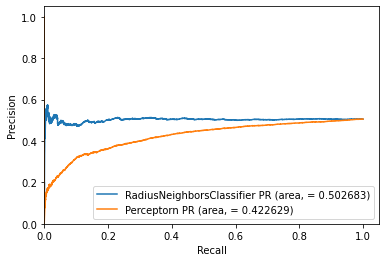

In [29]:
import matplotlib.pyplot as plt
def addPR(prob, occupancy, name, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area, = %f)' % (name, aps))

def addROC(prob, occupancy, name, test):
    tpr, fpr, thresholds = roc_curve(test, prob[:, occupancy])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % (name, roc_auc))

addPR(prob_perc, 0, 'RadiusNeighborsClassifier', y_test)
addPR(prob_rnc, 0, 'Perceptorn', y_test)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 4, fontsize = 'medium')
plt.show()

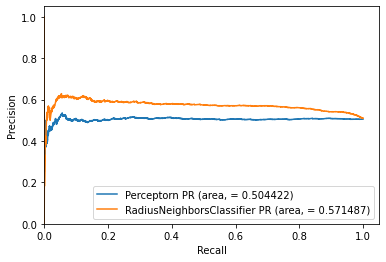

In [30]:
addPR(prob_perc, 1, 'Perceptorn', y_test)
addPR(prob_rnc, 1, 'RadiusNeighborsClassifier', y_test)

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 4, fontsize = 'medium')
plt.show()

### ROC-кривая

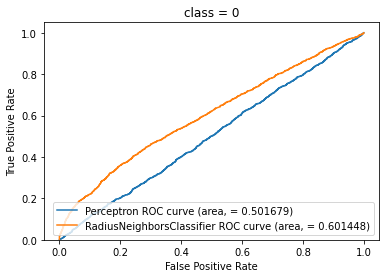

In [31]:
addROC(prob_perc, 0, 'Perceptron', y_test)
addROC(prob_rnc, 0, 'RadiusNeighborsClassifier', y_test)

plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4, fontsize = 'medium')
plt.title('class = 0')
plt.show()

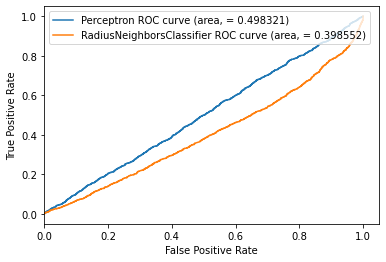

In [32]:
addROC(prob_perc, 1, 'Perceptron', y_test)
addROC(prob_rnc, 1, 'RadiusNeighborsClassifier', y_test)

plt.xlim([0, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 2, fontsize = 'medium')
plt.show()

9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Классификаторы имеют схожие кривые